In [1]:
import csv, math
from math import exp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Calculate the percentage error between two lists of data
def pe(ls1, ls2):
    if len(ls1) != len(ls2):
        print("Error: the input lists are of different length!")
        return 0
    else:
        n = len(ls1)
        sm = 0
        for i in range(0, n):
            sm += abs((ls1.iloc[i, 0]-ls2.iloc[i, 0])/ls2.iloc[i, 0])*100
        return sm/n

In [3]:
G = pd.read_csv('../../data/pid_bergman_recursive_local_G.csv', header=None)
X = pd.read_csv('../../data/pid_bergman_recursive_local_X.csv', header=None)
I = pd.read_csv('../../data/pid_bergman_recursive_local_I.csv', header=None)
m = pd.read_csv('../../data/meal_profile.csv', header=None)
G_plain = pd.read_csv('../../data/pid_bergman_recursive_plaintext_G.csv', header=None)
X_plain = pd.read_csv('../../data/pid_bergman_recursive_plaintext_X.csv', header=None)
I_plain = pd.read_csv('../../data/pid_bergman_recursive_plaintext_I.csv', header=None)

In [4]:
# Create meal profile to simulate one afternoon of diabetes patient
def meal_profile(t):
    if t < 100:
        m = 0
    # Lunch
    elif t >= 100 and t < 9000:
        m = 2 * exp(-0.001 * (t-100))
    # Snack
    elif t >= 9000 and t < 16000:
        m = 1 * exp(-0.001 * (t-9000))
    # Dinner
    elif t >= 16000 and t < 21600:
        m = 2 * exp(-0.001 * (t-16000))
    else:
        m = 0

    return m

In [5]:
G = G[2:]
X = X[2:]
I = I[2:]
g_target = 6
tend = 21600
tspan = [i for i in range(tend)]
# Set the thresholds
glucose_high = 8.3
glucose_low = 4.4

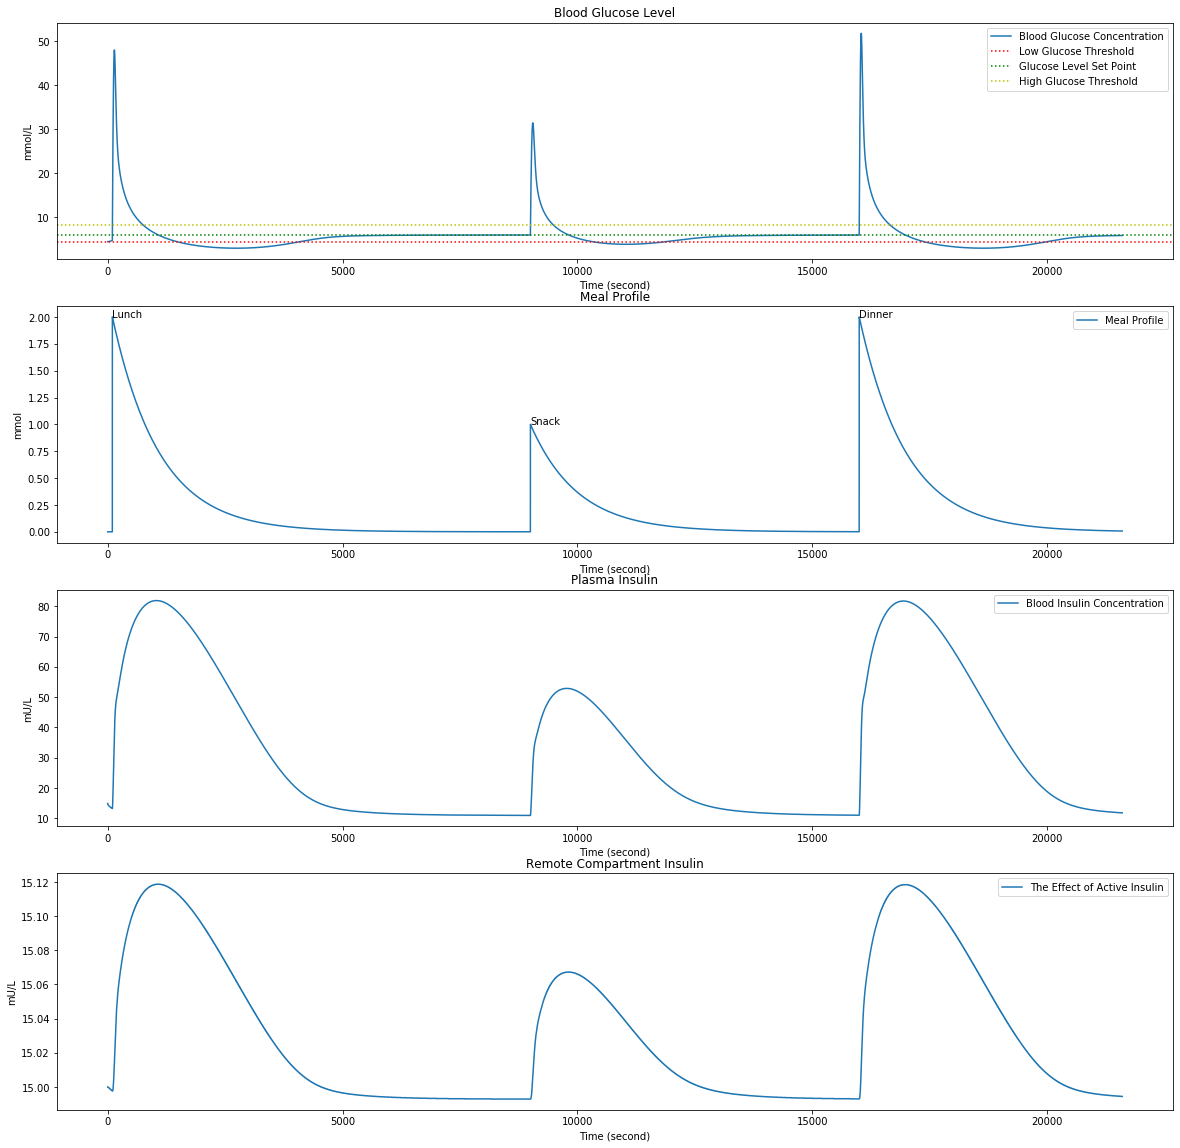

In [6]:
# Visulisation
plt.figure(figsize=(20, 20))
plt.subplot(4,1,1)
plt.plot(tspan,G, label='Blood Glucose Concentration')
plt.axhline(y = glucose_low, color = 'r', linestyle = ':', label='Low Glucose Threshold')
plt.axhline(y = g_target, color = 'g', linestyle = ':', label='Glucose Level Set Point')
plt.axhline(y = glucose_high, color = 'y', linestyle = ':', label='High Glucose Threshold')
plt.legend()
plt.xlabel('Time (second)')
plt.ylabel('mmol/L')
plt.title('Blood Glucose Level')

plt.subplot(4,1,2)
plt.text(100, 2, 'Lunch')
plt.text(9000, 1, 'Snack')
plt.text(16000, 2, 'Dinner')
plt.plot(tspan, m, label='Meal Profile')
plt.legend()
plt.xlabel('Time (second)')
plt.ylabel('mmol')
plt.title('Meal Profile')

plt.subplot(4,1,3)
plt.plot(tspan, I, label='Blood Insulin Concentration')
plt.legend()
plt.xlabel('Time (second)')
plt.ylabel('mU/L')
plt.title('Plasma Insulin')

plt.subplot(4,1,4)
plt.plot(tspan, X, label='The Effect of Active Insulin')
plt.legend()
plt.xlabel('Time (second)')
plt.ylabel('mU/L')
plt.title('Remote Compartment Insulin')

plt.show()

In [8]:
G_error = pe(G, G_plain)
X_error = pe(X, X_plain)
I_error = pe(I, I_plain)

print("Error between encrypted G and plaintext G: ", G_error*100 , "%")
print("Error between encrypted X and plaintext X: ", X_error*100, "%")
print("Error between encrypted I and plaintext I: ", I_error*100, "%")

Error between encrypted G and plaintext G:  0.005913975330028746 %
Error between encrypted X and plaintext X:  0.016495641880630386 %
Error between encrypted I and plaintext I:  0.01284216846510668 %
